In [132]:
###Project Fashion-Classification - End to End 
 
#Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
 
#Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)
 


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [134]:
## TO WORK WITH KEARS PROPERLY FOLLOW THIShttps://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/keras_tuner.ipynb#scrollTo=OHlHs9Wj_PUM

## LOAD DATA

In [135]:
!pip install -q -U keras-tuner

In [136]:
import keras_tuner as kt

In [137]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

### Print Shape of Data

In [138]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [139]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [140]:
y_train[0] #9 => Ankle boot

9

In [141]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

### SHOW IMAGES

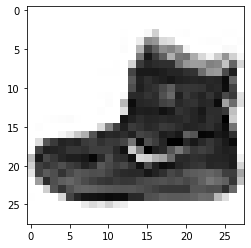

In [142]:
plt.imshow(X_train[0], cmap='Greys')

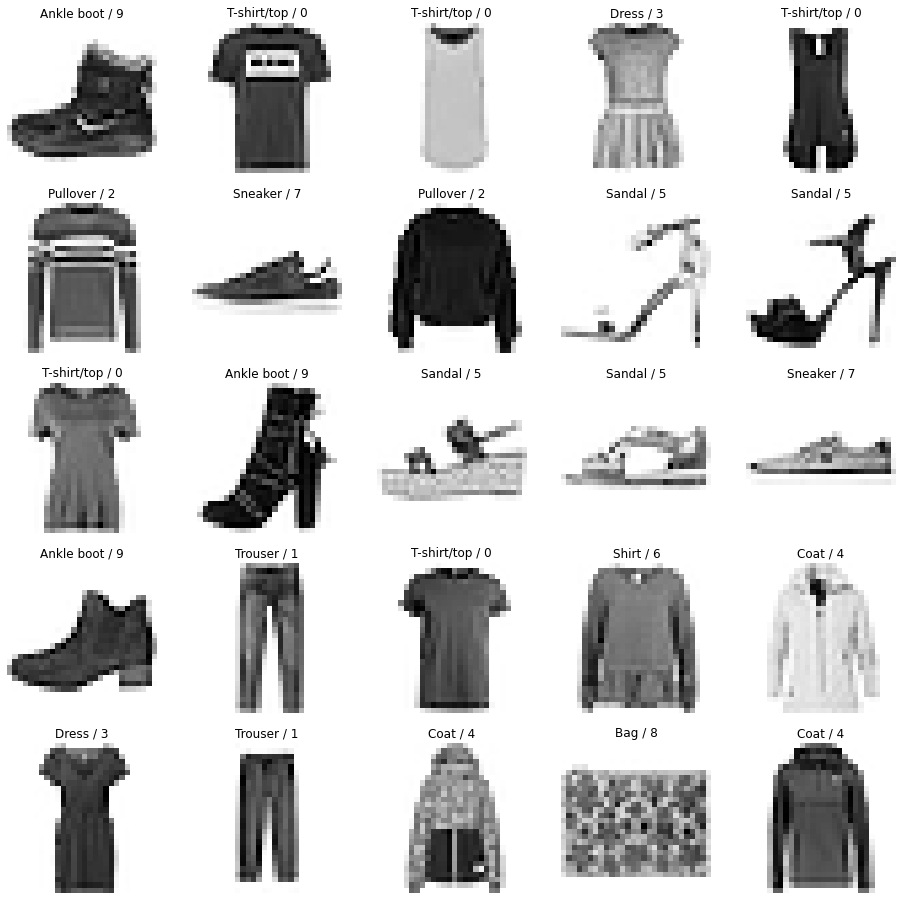

In [143]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

### *Change* *Dimention*

In [144]:
X_train.shape

(60000, 28, 28)

In [145]:
X_train.ndim

3

In [146]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [147]:
X_train.ndim

4

### Feature Scaling

In [148]:
X_train = X_train/255
X_test = X_test/255

### Splits Datasets

In [149]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [150]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

### Convolutional Neural Network - Model Building

*   List item
*   List item



In [151]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [152]:
cnn_model.summary() # get the summary of model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [153]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [154]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 2s 18ms/step - loss: 0.6477 - accuracy: 0.7823 - val_loss: 0.4436 - val_accuracy: 0.8437
Epoch 2/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3766 - accuracy: 0.8679 - val_loss: 0.3606 - val_accuracy: 0.8780
Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3343 - accuracy: 0.8821 - val_loss: 0.3352 - val_accuracy: 0.8830
Epoch 4/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2992 - accuracy: 0.8948 - val_loss: 0.3077 - val_accuracy: 0.8936
Epoch 5/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2867 - accuracy: 0.8970 - val_loss: 0.3107 - val_accuracy: 0.8905
Epoch 6/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2665 - accuracy: 0.9049 - val_loss: 0.2932 - val_accuracy: 0.8964
Epoch 7/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2523 - accuracy: 0.9099 - val_loss: 0.2841 - val_accuracy: 0.8999
Epoch 8/10
94

# TEST THE MODEL

In [155]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.14, 0.05, 0.01]], dtype=float32)

In [156]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [157]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2814 - accuracy: 0.8982


[0.2814314067363739, 0.8981999754905701]

# Visualize output

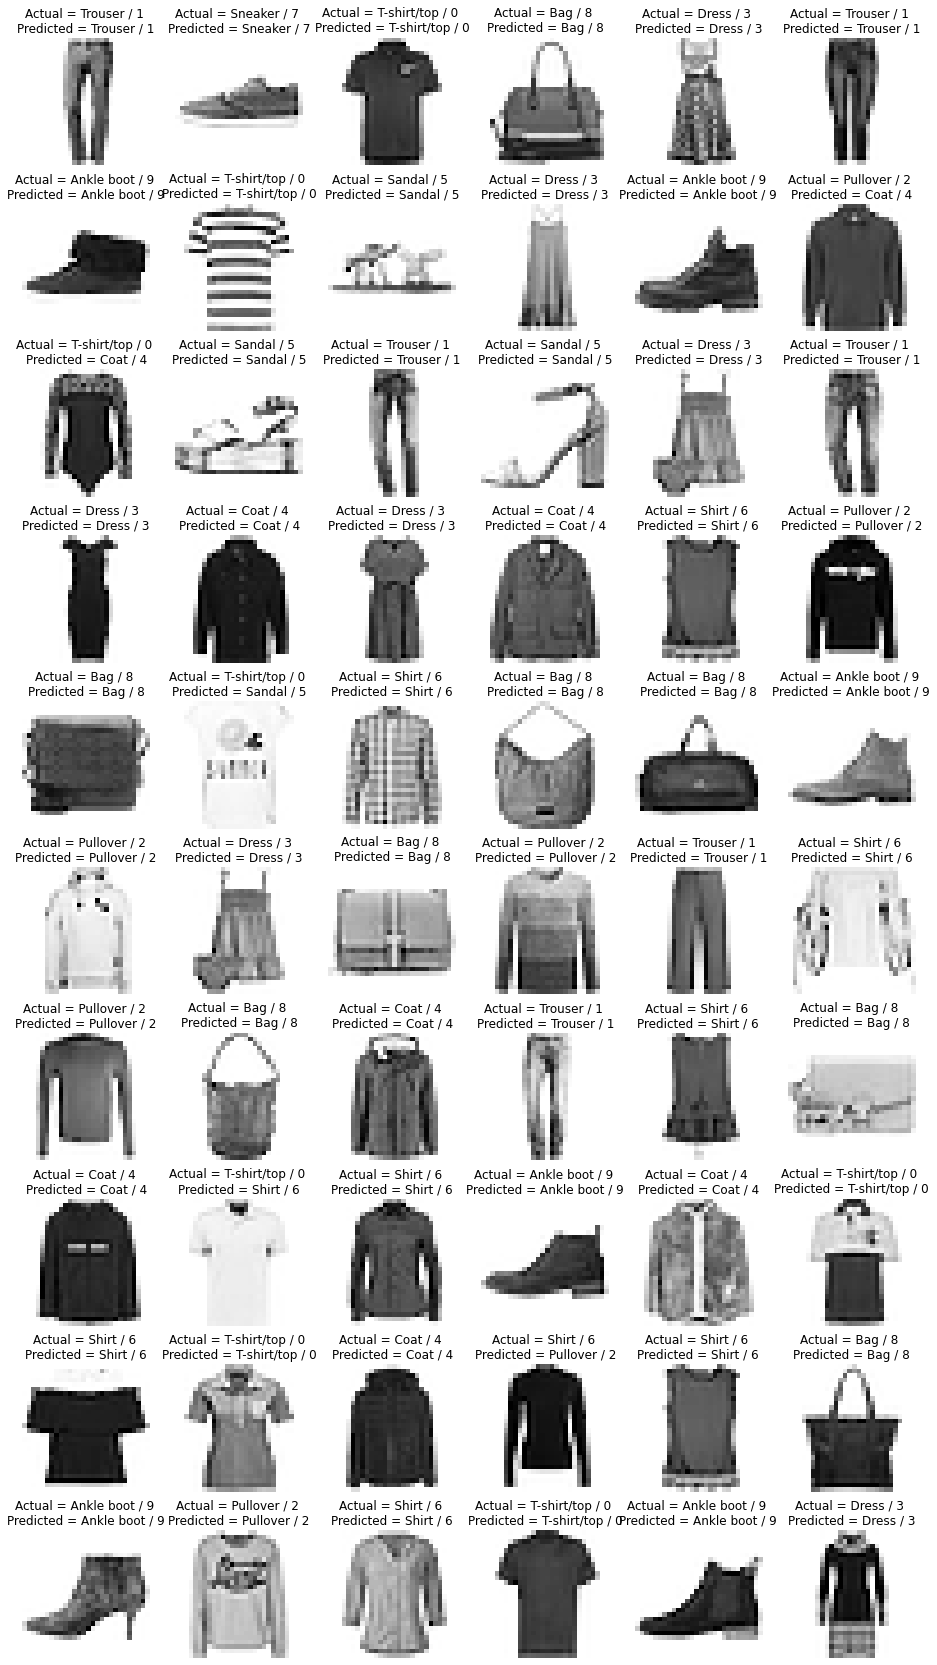

In [160]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

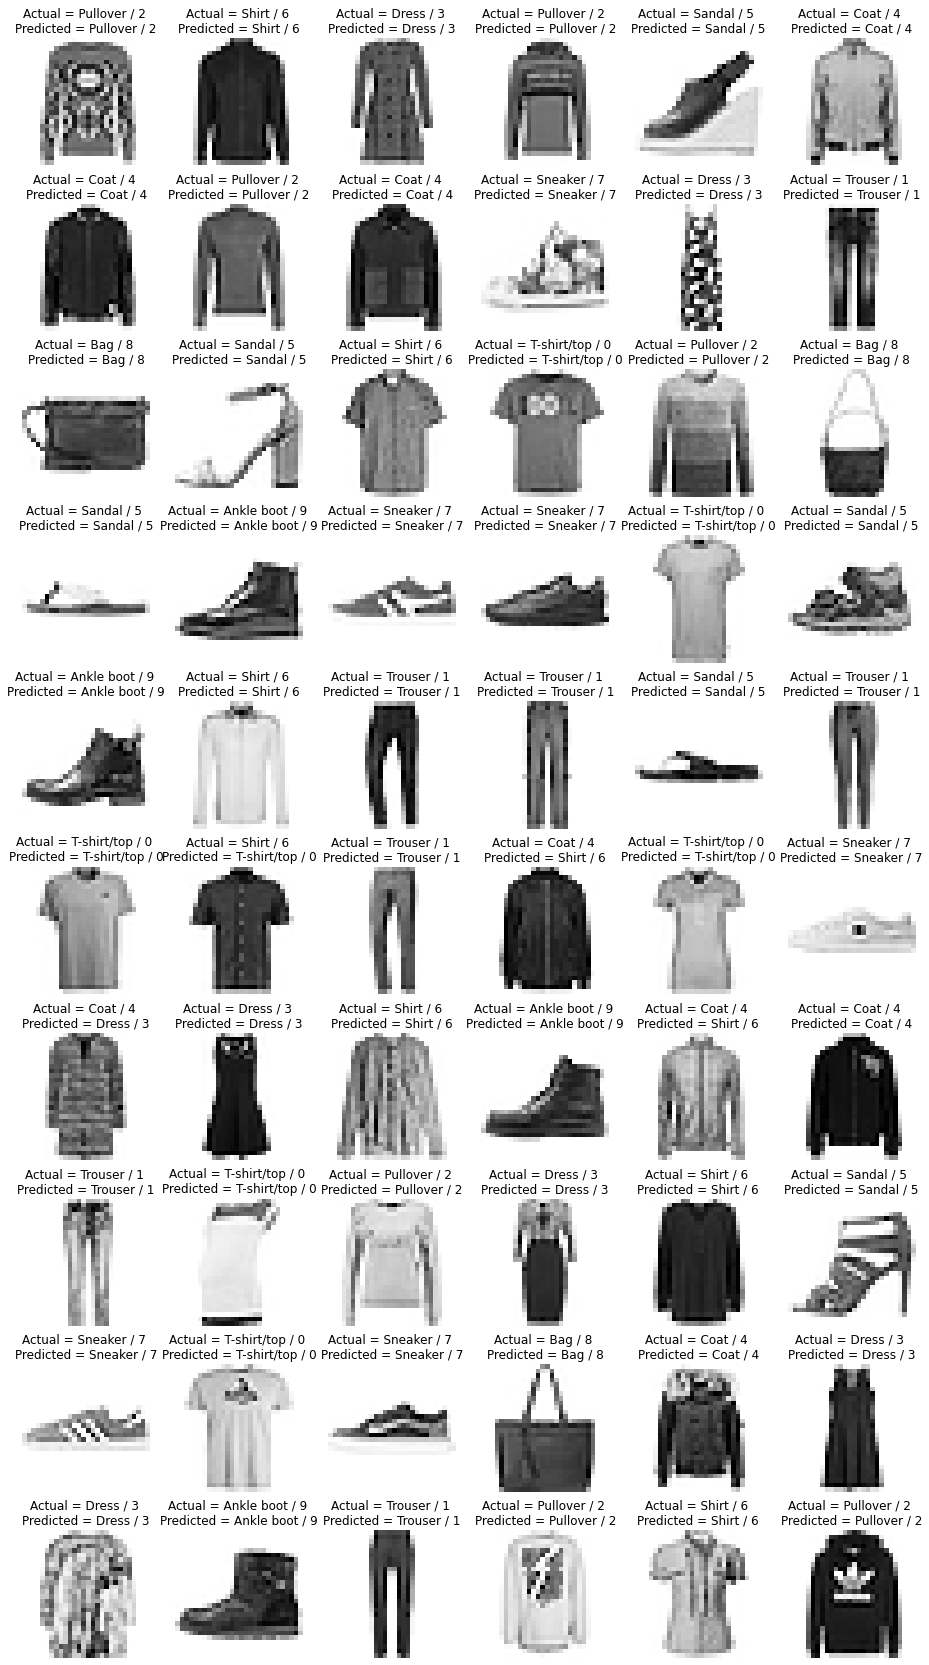

In [161]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


# *Confusion* *Matrix*

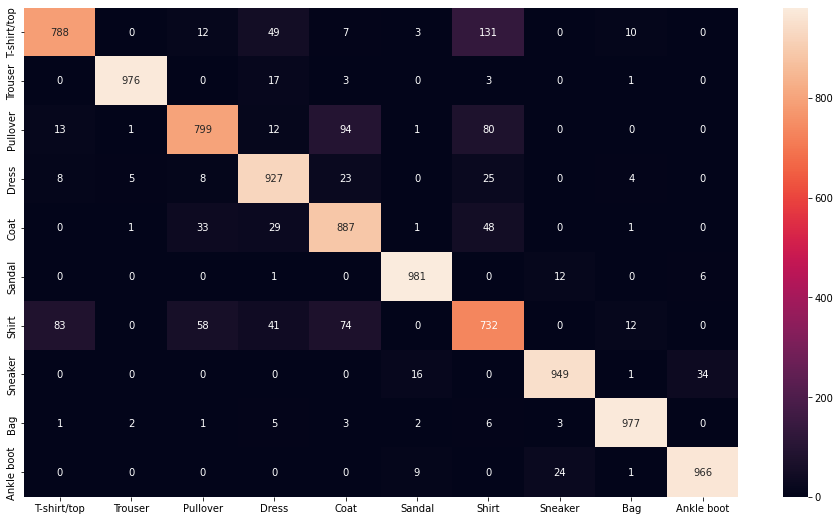

In [162]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [163]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.79      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.80      0.84      1000
       Dress       0.86      0.93      0.89      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# SAVE MODEL CNN FASHION MNIST

In [164]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

### LOAD MODEL

In [165]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [166]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [167]:
np.argmax(Y_pred_sample[0])

9

In [168]:
y_test[0]

9

 ## *Convolutional* Neural Network - *Building Complex Model*

In [169]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [170]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [171]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 3s 22ms/step - loss: 1.0281 - accuracy: 0.6143 - val_loss: 0.6071 - val_accuracy: 0.7585
Epoch 2/20
94/94 [==============================] - 2s 19ms/step - loss: 0.5674 - accuracy: 0.7851 - val_loss: 0.4821 - val_accuracy: 0.8247
Epoch 3/20
94/94 [==============================] - 2s 19ms/step - loss: 0.4760 - accuracy: 0.8257 - val_loss: 0.4159 - val_accuracy: 0.8457
Epoch 4/20
94/94 [==============================] - 2s 19ms/step - loss: 0.4220 - accuracy: 0.8468 - val_loss: 0.3756 - val_accuracy: 0.8626
Epoch 5/20
94/94 [==============================] - 2s 19ms/step - loss: 0.3815 - accuracy: 0.8616 - val_loss: 0.3513 - val_accuracy: 0.8684
Epoch 6/20
94/94 [==============================] - 2s 19ms/step - loss: 0.3550 - accuracy: 0.8719 - val_loss: 0.3318 - val_accuracy: 0.8755
Epoch 7/20
94/94 [==============================] - 2s 19ms/step - loss: 0.3344 - accuracy: 0.8761 - val_loss: 0.3288 - val_accuracy: 0.8788
Epoch 8/20
94

In [172]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

# VERY COMPLEX MODEL

In [173]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [174]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [175]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 4s 40ms/step - loss: 1.2177 - accuracy: 0.5206 - val_loss: 0.6364 - val_accuracy: 0.7495
Epoch 2/50
94/94 [==============================] - 3s 37ms/step - loss: 0.6059 - accuracy: 0.7704 - val_loss: 0.4900 - val_accuracy: 0.8083
Epoch 3/50
94/94 [==============================] - 3s 37ms/step - loss: 0.4928 - accuracy: 0.8125 - val_loss: 0.4378 - val_accuracy: 0.8321
Epoch 4/50
94/94 [==============================] - 3s 37ms/step - loss: 0.4296 - accuracy: 0.8432 - val_loss: 0.3719 - val_accuracy: 0.8625
Epoch 5/50
94/94 [==============================] - 3s 37ms/step - loss: 0.3807 - accuracy: 0.8652 - val_loss: 0.3733 - val_accuracy: 0.8622
Epoch 6/50
94/94 [==============================] - 3s 37ms/step - loss: 0.3425 - accuracy: 0.8786 - val_loss: 0.3276 - val_accuracy: 0.8815
Epoch 7/50
94/94 [==============================] - 3s 37ms/step - loss: 0.3234 - accuracy: 0.8869 - val_loss: 0.3057 - val_accuracy: 0.8892
Epoch 8/50
94

In [176]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [ ]:
cnn_model3.evaluate(X_test, y_test)

# TASK END